 
## Parallel Coordinate Plot

Another way to view multiple dimensions of a dataset in one plot is by using a **Parallel Coordinate Plot**. A Parallel Coordinate Plot consists of a number of vertical parallel axes on which lines are plotted for each entry in the dataset. This way some features for some unknown clusters might get bundled together and that way you can follow the lines and look at how they are represented in the other dimensions.

<IPython.core.display.Javascript object>


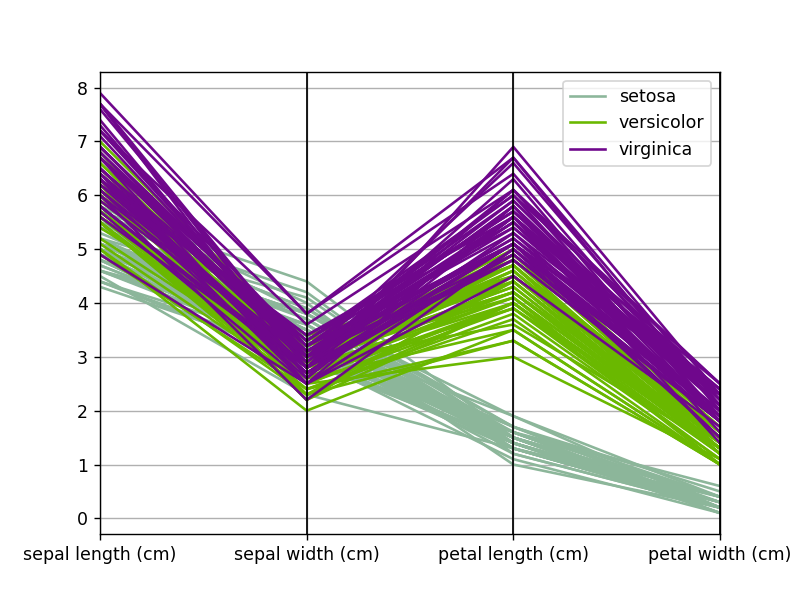

In [1]:
# Lets clear all previous python imports and variables by resetting the python kernel to prevent any conflicts.
%reset -f

%matplotlib nbagg

# Now import all the needed packages and modules
import matplotlib               # Matplotlib is the core package to plot publication grade images
import matplotlib.pyplot as plt # # Pyplot: a collection functions that make matplotlib work like MATLAB
import pandas as pd             # Pandas is the data analysis and 'visualization' package 
from pandas.plotting import parallel_coordinates # Import the parallel coordinate plotter
from sklearn import datasets

# First lets load the Fisher Iris dataset
irisDataset    = datasets.load_iris()

# Now lets prepare the Fisher Iris dataset to the dataframe format of pandas
irisDataFrame  = pd.DataFrame(data=irisDataset.data, columns=irisDataset.feature_names);
speciesNames   = irisDataset.target_names;
irisDataFrame['speciesByName'] = [speciesNames[x] for x in irisDataset.target];

plt.figure()
parallel_coordinates(irisDataFrame, 'speciesByName');

This was a relatively small dataset (150 entries) on which the parallel coordinates work as intended. But if you would have a dataset with a large amount of entries the parallel coordinate plot can become cluttered and incomprehensible.

To show you what it will look like we'll be visualizing a Human Resources dataset of a big company. This company wants to know why all their best employees leave the company. So to start lets first load the dataset into a dataframe.

In [2]:
# Lets clear all previous python imports and variables by resetting the python kernel to prevent any conflicts.
%reset -f

%matplotlib nbagg

# Now import all the needed packages and modules
import matplotlib               # Matplotlib is the core package to plot publication grade images
import matplotlib.pyplot as plt # # Pyplot: a collection functions that make matplotlib work like MATLAB
import pandas as pd             # Pandas is the data analysis and 'visualization' package
from pandas.plotting import parallel_coordinates # Import the parallel coordinate plotter
from sklearn import datasets

matplotlib.rcParams['figure.figsize'] = (12.0, 10.0) # change the default figsize to be larger

# Now lets load the HR dataset
# for performance reasons we only sample 1000 data points 
HRresources = pd.read_csv('./data/parallelCoord/HR_comma_sep.csv')
HRresources

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


As you can see this dataset is relatively big with 15000 entries, instead of the 150 entries of the previous dataset. For each data entry, which represents an employee of the company, we have the following columns:
- **satisfaction_level**: How satisfied the employee is with the company.
- **last_evaluation**: The evaluation of the employee by the company.
- **number_project**: The number of projects the empolyee has worked on.
- **average_montly_hours**: The average monthly hours spent working for the company.
- **time_spend_company**: The years spent at the company
- **Work_accident**: If the employee was ever involved with a work related incident.
- **left**: If the employee left the company.
- **promotion_last_5years**: If the employee got a promotion in the last 5 years.
- **sales**: The department the employee was working for. 
- **salary**: The salary of the employee indicated by low, medium and high income.

Now that the dataset is loaded lets see if we can find why for this company all their best employees leave the company. So first off lets just plot the current dataframe.

<IPython.core.display.Javascript object>


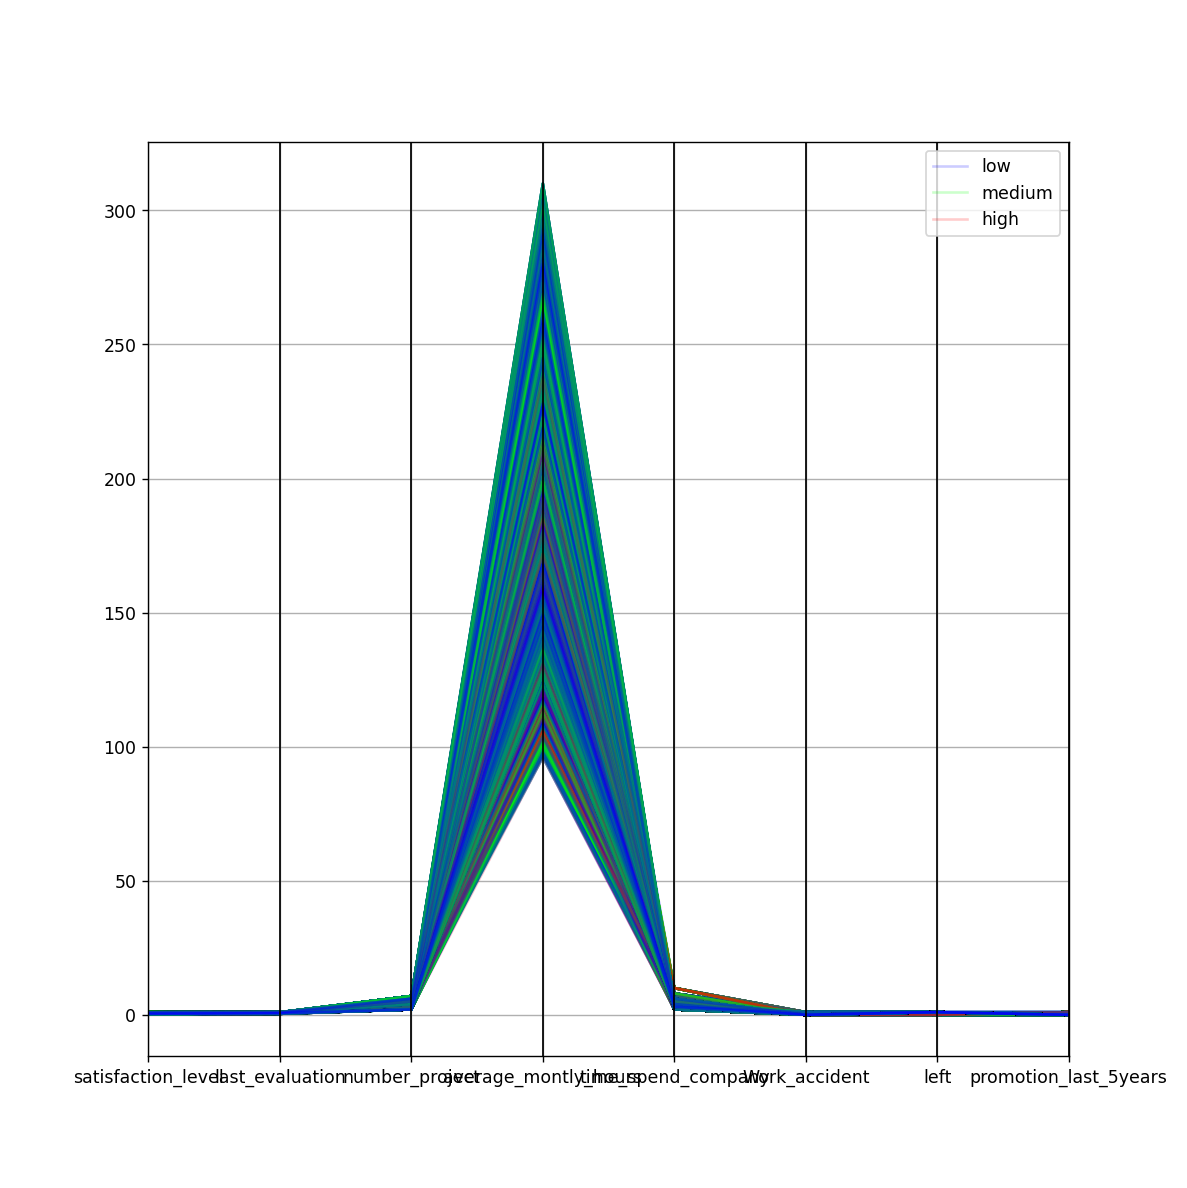

In [3]:
# Create a plot for the parallel coordinated plot ot be drawn in
plt.figure(figsize=(9.5,9.5))

parallel_coordinates(
    # We'll drop the "sales" column for convenience because it is not numerical 
    # which the parallel coordinate plot can't handle.
    HRresources.drop(['sales'], axis=1), 
    # We'll use the "salary" column to color code the lines
    'salary',
    # The colors for the lines will be blue for low, green for medium and red for high.
    color=[[0,0,1,0.2],[0,1,0,0.2],[1,0,0,0.2]]);

As you can see there is not much to see because the scales are not automatically normalized or scaled per axis. So for this we are gonna prepare the data a bit so that all values are scaled from 0 to 1.

In [4]:
# To make the plot more readable the column names are changed to shorter names.
HRresources_mod = HRresources.rename({'satisfaction_level':'sat_lev',
                                           'last_evaluation':'last_eval', 
                                           'number_project':'nr_projects', 
                                           'average_montly_hours':'avg_mon_hr', 
                                           'time_spend_company':'t_spd_comp', 
                                           'Work_accident':'wrk_accid',
                                           'promotion_last_5years':'prom_last_5y'}, 
                                            axis='columns')

# Normalize the average hours per months data column
a_m_h_column = HRresources_mod['avg_mon_hr']
HRresources_mod['avg_mon_hr'] = (a_m_h_column - a_m_h_column.min()) / (a_m_h_column.max()-a_m_h_column.min())

# Normalize the time years spend at the company data column
t_s_c_column = HRresources_mod['t_spd_comp']
HRresources_mod['t_spd_comp'] = (t_s_c_column - t_s_c_column.min()) / (t_s_c_column.max()-t_s_c_column.min())

# Normalize the number of projects data column
n_p_column = HRresources_mod['nr_projects']
HRresources_mod['nr_projects'] = (n_p_column - n_p_column.min()) / (n_p_column.max()-n_p_column.min())

# Change the salary column to numerical values so they can be plotted on an axis
HRresources_mod['salary'] = HRresources_mod['salary'].map({"low":0.0, "medium":0.5, "high":1.0}, na_action=None)

# Change the left column to yes and no instead of 0 and 1 to use this column for color coding
HRresources_mod['left'] = HRresources_mod['left'].map(lambda x: "yes" if x == 1 else "no", na_action=None)

# Drop the sales column because they are all categorial values (strings)
HRresources_mod = HRresources_mod.drop(['sales'], axis=1)

Now that we created a modified dataframe we can plot it again and see how it looks now. This plot will have a different color coding, based on whether the employee left (colored red) or not (colored blue) to make it easier to find any conclusions.

<IPython.core.display.Javascript object>


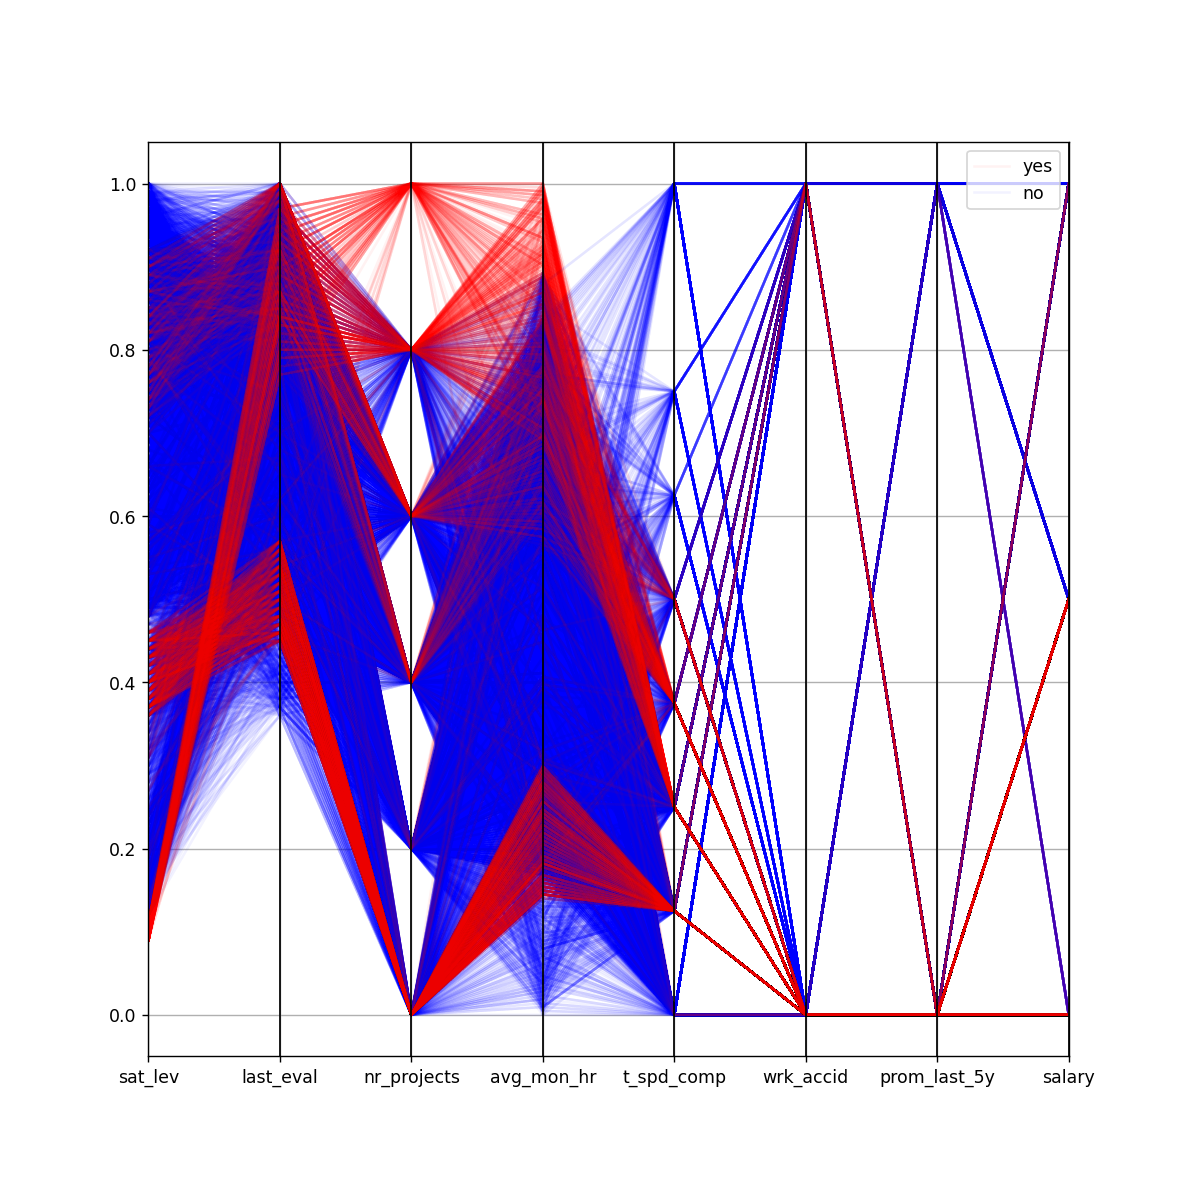

In [5]:
plt.figure(figsize=(9.5,9.5))
parallel_coordinates(
    HRresources_mod,
    'left',
    color=[[1.0,0.0,0.0,0.05],[0.0,0.0,1.0,0.05]]);

As you can see its pretty cluttered and its hard to distinguish each line from one another and the 0 or 1 values do not really work in a parallel coordinate plot. But nevertheless there are some patterns that you can find in this plot are that there are a large amount of employees with a below average satisfaction, average evaluation, low amount of projects, low monthly hours and low amount of years at the company, who left the company. But to answer the question on why all their good employees leave we have to dig a little further and we are gonna do that by simply filtering out the evaluation scores of the employees below 0.8.

<IPython.core.display.Javascript object>


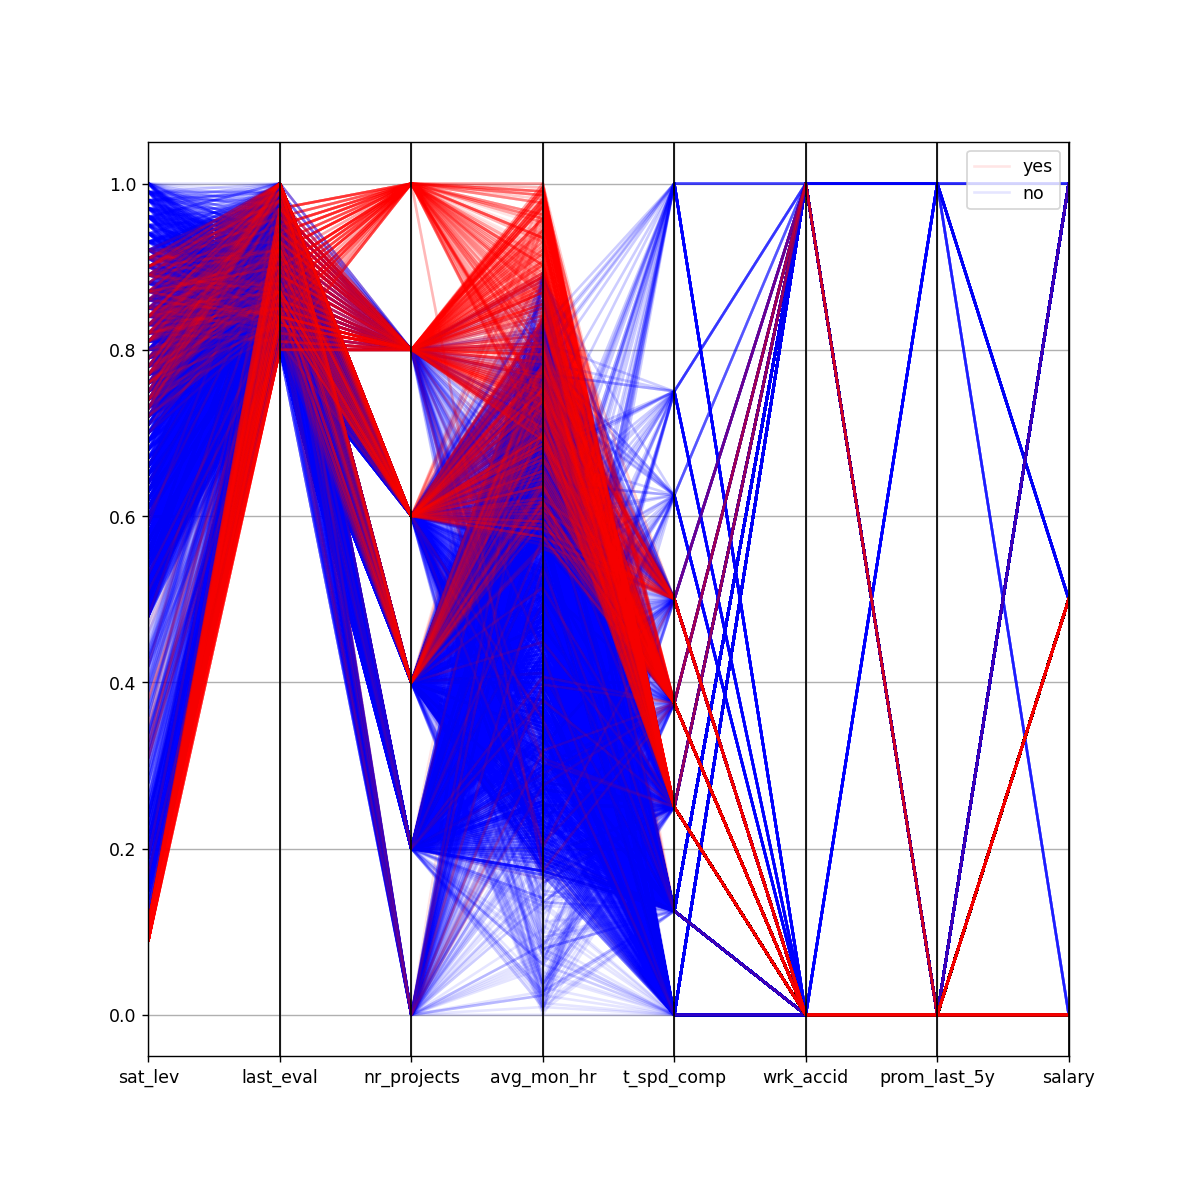

In [6]:
plt.figure(figsize=(9.5,9.5))
parallel_coordinates(
    HRresources_mod[(HRresources_mod.last_eval >= 0.8)],
    'left',
    color=[[1.0,0.0,0.0,0.1],[0.0,0.0,1.0,0.1]]);

Now it is a lot clearer why their good employees are leaving the company. It is clear that most of them have a high number of projects and spent a lot of hours a month at the company. Off course as you might have thought of yourself the most easy solution see why people are leaving is to only filter on the employees that actually leave, as you can see below.

<IPython.core.display.Javascript object>


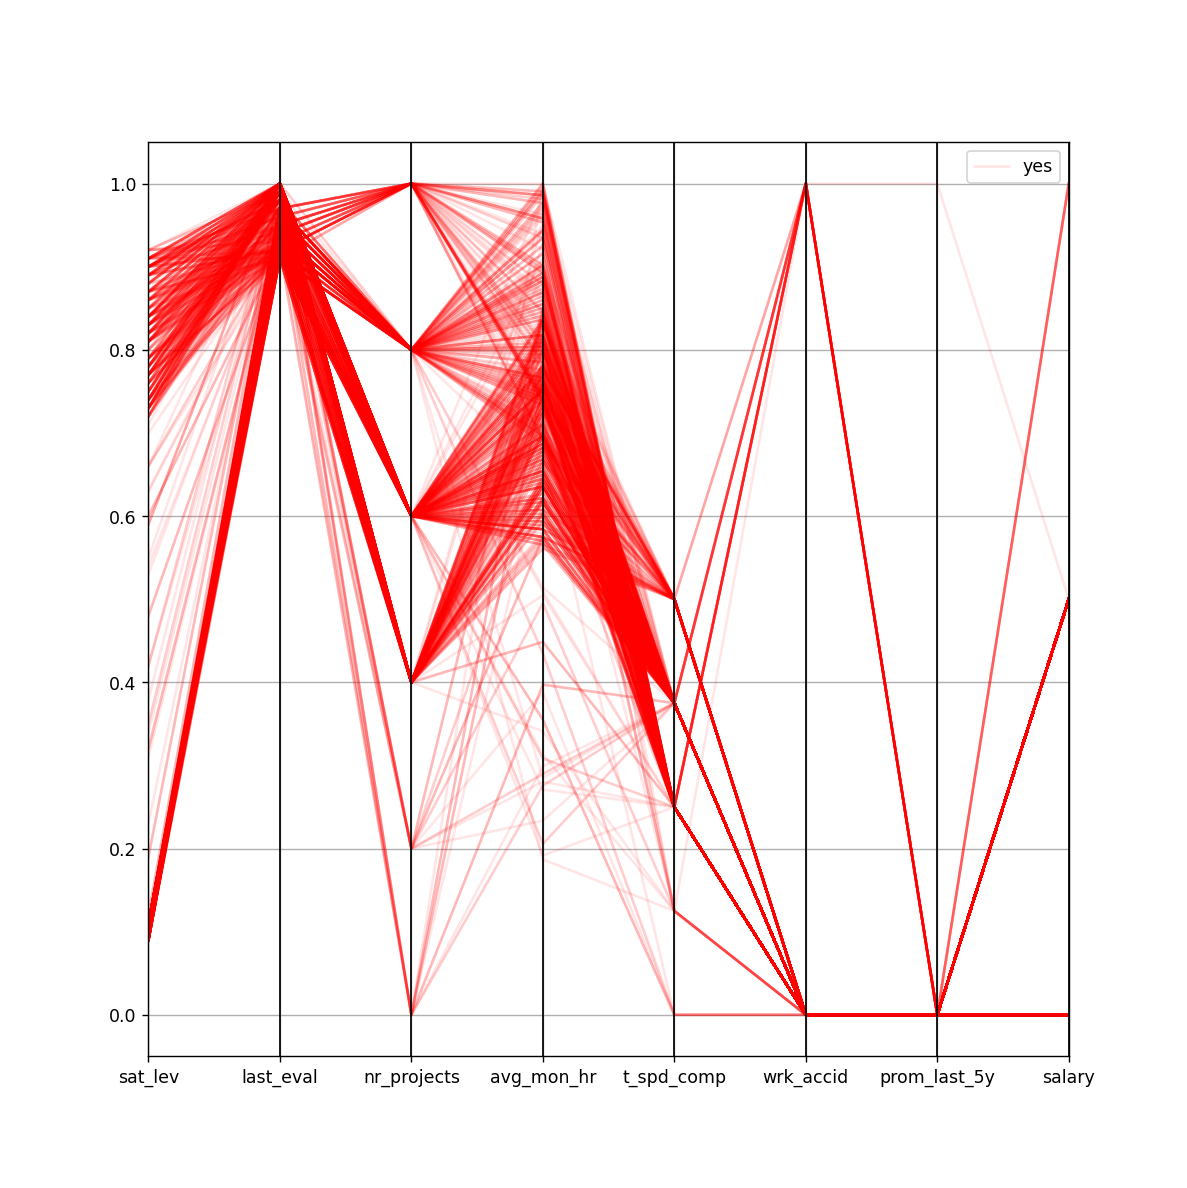

In [7]:
plt.figure(figsize=(9.5,9.5))
parallel_coordinates(
    HRresources_mod[(HRresources_mod.last_eval > 0.9) & (HRresources_mod.left == "yes")],
    'left',
    color=[[1.0,0.0,0.0,0.1],[0.0,0.0,1.0,0.1]]);

Here you can see the biggest reason they all left is because they didn't got any promotion in the last 5 years. 

The parallel coordinate plots with matplotlib and pandas are a bit limited for datasets with a high amount of data entires and it takes some filtering to draw conclusions out of the data. Although it is still hard to see where some lines begin and where they end.

By adding some ways to select or highlight the values in the parallel coordinate plot it can be turned into an insightful interactive tool. In the [Appendix A. D3js examples](./A.&#32;D3js&#32;examples.ipynb) you can find an interactive Parallel Coordinate plot in javascript with the [D3js library](http://d3js.org/).

This concludes the Parallel coordinate plot course material now you may proceed to the Network graph notebook by clicking on the following link: [Network graphs](./3.&#32;Network&#32;graphs.ipynb).